In [65]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Collections

In [71]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

# save the dataset to a CSV file
df.to_csv('iris_dataset.csv', index=False)
print("Dataset saved to 'iris_dataset.csv'")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Dataset saved to 'iris_dataset.csv'


#### Data Review and Profiling

In [67]:
missing_value = df.isnull().sum()
print("Missing Values:")
print(missing_value)

print("Unique Values:")
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values}")

print(f"Data Dimension (rows, columns): {df.shape})")

print("Data Information:")
df.info()

print("Data Description:")
print(df.describe())

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Unique Values:
sepal length (cm): 35
sepal width (cm): 23
petal length (cm): 43
petal width (cm): 22
target: 3
Data Dimension (rows, columns): (150, 5))
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
Data Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333     

#### Modeling

In [68]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with appropriate input shape
    layers.Dense(32, activation='relu'), # Hidden layer
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Choose appropriate loss function for your task
    metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy Keras: {accuracy}")

# Make Predictions on the test data
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32") # Convert probabilities to class labels

# Calculate the accuracy of the model
accuracy_sklearn = accuracy_score(y_test, y_pred_class)
print(f"Accuracy Sklearn: {accuracy_sklearn}")

# Generate a classifications report
report = classification_report(y_test, y_pred_class, zero_division=1)
print(f"Classification Report:")
print(report)

/Users/me/learn/datascience-nb/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6000 - loss: 0.5900 - val_accuracy: 0.6333 - val_loss: 0.3954
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6417 - loss: 0.3355 - val_accuracy: 0.3000 - val_loss: 0.1879
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3667 - loss: 0.1727 - val_accuracy: 0.3000 - val_loss: 0.0241
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3417 - loss: 0.0313 - val_accuracy: 0.3000 - val_loss: -0.1175
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3417 - loss: -0.0772 - val_accuracy: 0.3000 - val_loss: -0.2326
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3417 - loss: -0.1727 - val_accuracy: 0.3000 - val_loss: -0.3456
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3417 - loss: -0.2793 - val_accuracy: 0.3000 - val_loss: -0.4572
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3417 - loss: -0.3762 - val_accuracy: 0.3000 - val_loss

#### Model Visualization

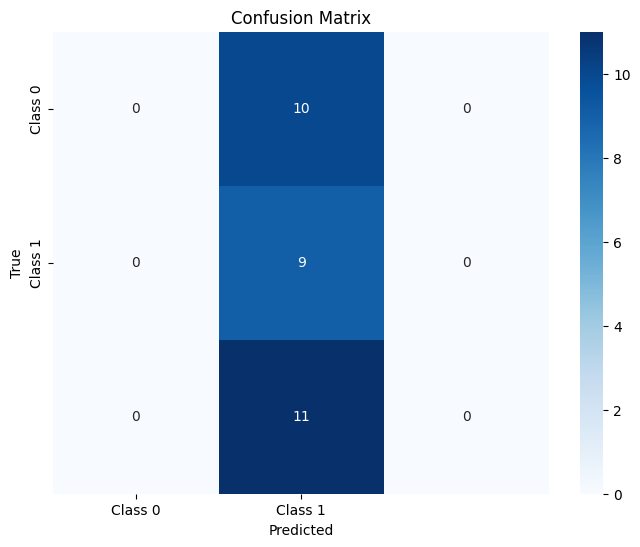

In [69]:
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
plt.tight_layout()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Model Prediction

In [70]:
# Make predictions on new data
X_new = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2],
     [6.3, 3.3, 6.0, 2.5],
     [5.9, 3.0, 4.2, 1.5]],
    columns=iris.feature_names
)
print(X_new.head())

# Make predictions using the trained model
predictions = model.predict(X_new)
print(predictions)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                6.3               3.3                6.0               2.5
2                5.9               3.0                4.2               1.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0.635941  ]
 [0.9713186 ]
 [0.93076754]]
